# Assignment 6 - Weather

Knock airport Weather. Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

The temperature
The mean temperature each day
The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
The max windspeed for each day
The monthly mean of the daily max windspeeds (yer I am being nasty here)
You do not need to over comment your code. Marks will be given for how nice the plots are.

In [1]:
# Import Pandas library to load the data.
import pandas as pd

In [2]:
# Load DataFrame.
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23) # The first column starts in line 24.

# Check the first 3 rows.
df.head(3)

C:\Users\amand\AppData\Local\Temp\ipykernel_17284\2934260067.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23) # The first column starts in line 24.


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [3]:
# Import datetime to treat the column "date" as datetime object.
import datetime
df["date"]= pd.to_datetime(df["date"], format="%d-%b-%Y %H:%M")

In [4]:
# Check if date is now a datetime object.
df["date"]

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
246925   2024-09-30 20:00:00
246926   2024-09-30 21:00:00
246927   2024-09-30 22:00:00
246928   2024-09-30 23:00:00
246929   2024-10-01 00:00:00
Name: date, Length: 246930, dtype: datetime64[ns]

In [5]:
# Import seaborn to plot.
import seaborn as sns

<Axes: xlabel='date', ylabel='temp'>

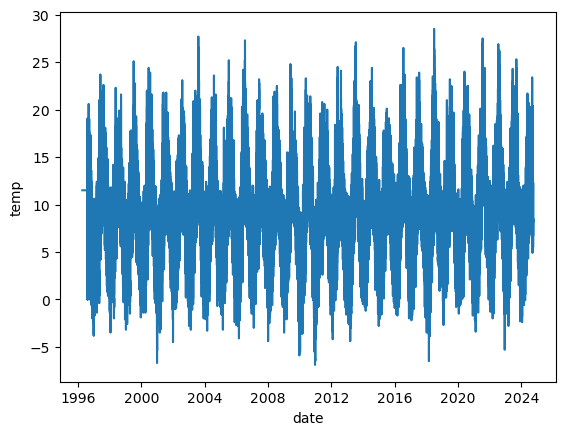

In [6]:
# Plot temperature along the time.
sns.lineplot(data=df, x="date", y="temp")

In [7]:
# Temperature mean in all the data.
df["temp"].mean()

8.763200097193534

In [ ]:
# Calculate the mean temperature for each day.
days= df["date"].dt.strftime("%Y-%m-%d")
daily_mean_temp = df.groupby(days)["temp"].transform("mean")

# Create a new column in the original DataFrame.
df["daily_mean_temp"] = daily_mean_temp

# Check.
df.head(3)

# # https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html
# https://realpython.com/pandas-groupby/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html
# https://pandas.pydata.org/docs/user_guide/groupby.html#the-transform-method

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_mean_temp
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,25,81,0.0,35000,32,5,11.50
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,25,82,0.0,40000,45,5,12.65
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,80,81,0.0,8000,32,7,12.65


<Axes: xlabel='date', ylabel='daily_mean_temp'>

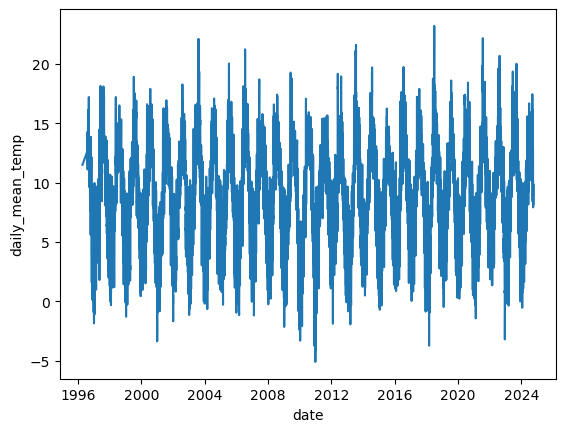

In [9]:
# Plot.
sns.lineplot(data=df, x="date", y="daily_mean_temp")

In [10]:
# Calculate the mean temperature for each month.
months= df["date"].dt.strftime("%Y-%m")
monthly_mean_temp = df.groupby(months)["temp"].transform("mean")

# Create a new column with the monthly mean temperatures.
df["monthly_mean_temp"] = monthly_mean_temp

# check.
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_mean_temp,monthly_mean_temp
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,25,81,0.0,35000,32,5,11.500000,11.500000
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,25,82,0.0,40000,45,5,12.650000,12.650000
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,80,81,0.0,8000,32,7,12.650000,12.650000
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,25,82,0.0,28000,35,6,12.650000,12.650000
4,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,2,11,0.0,40000,40,6,12.650000,12.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246925,2024-09-30 20:00:00,0,1.1,0,9.5,0,9.4,9.2,11.7,99,...,2,340,,,0.0,,0,8,9.891667,11.741389
246926,2024-09-30 21:00:00,0,0.0,0,8.6,0,8.6,8.6,11.2,100,...,2,330,,,0.0,,0,8,9.891667,11.741389
246927,2024-09-30 22:00:00,0,0.1,0,8.5,0,8.4,8.2,10.9,99,...,2,320,,,0.0,,0,8,9.891667,11.741389
246928,2024-09-30 23:00:00,0,0.0,0,8.2,0,8.0,7.8,10.6,97,...,2,330,,,0.0,,0,8,9.891667,11.741389


<Axes: xlabel='date', ylabel='monthly_mean_temp'>

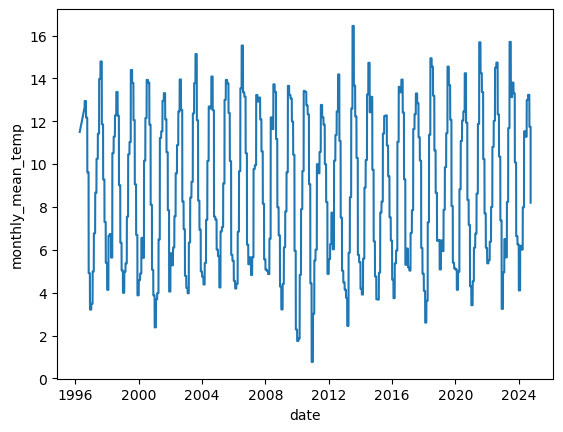

In [11]:
# Plot.
sns.lineplot(data=df, x="date", y="monthly_mean_temp")